In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [23]:
curr_dir=os.getcwd()
#print(curr_dir)
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
#df=df[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
#       'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
#       'Chest Pain', 'Coughing of Blood', 'Level'
#]]

df=df.drop("index", axis=1)
df.head()


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [24]:
#Feature importance based on PCA with n_components=3
f_pca=['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

#features selected using Method 3
feature_set_dt=['Coughing of Blood',
 'Wheezing',
 'Obesity',
 'Snoring',
 'Air Pollution',
 'Clubbing of Finger Nails',
 'Swallowing Difficulty'
 ]

feature_set_rf=[
    'Coughing of Blood',
    'Fatigue',
    'Alcohol use',
    'Smoking',
    'Genetic Risk',
    'OccuPational Hazards',
    'Chest Pain',
    'chronic Lung Disease',
    'Age'
]

In [25]:
from sklearn.model_selection import train_test_split
# X = df[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
#        'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
#        'Chest Pain', 'Coughing of Blood']]

X = df.drop(["Patient Id","Level"], axis=1)


# Can replace this with our features when we have
y = df["Level"]
#X.head()
#Y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score


linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo')
linear_clf.fit(X_train, y_train)

y_pred = linear_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)



Accuracy:  1.0


### Perform hyperparameter tuning with GridSearchCV so that we can find the most optimal hyperparameter


Hyperparmeteres are external parameters where user specificies the values controlling the learning process of the model training. These are adjustable paramaeters used to obtain an optimal model which achieve the highest accuracy. 
We specifically provide GridSearchCV with a set of parameters to experiment with and it systematically explores each possible combination and evaluate model's performance on the validation set. Moreover, k-fold cross validation is used to divide the trian into k partitions with k=5. Repeat for all folds : Train on k-1 parts and leave one part out as validation set. This allows us to have a good estimate of the validation error by averaging the validation error over all folds


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'decision_function_shape':['ovr', 'ovo']}
knn_params = {'n_neighbors': [3, 5, 7, 9]}

# Perform Grid Search for each model
svm_grid = GridSearchCV(SVC(), param_grid=svm_params, cv=5)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5)
svm_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)

print("Best SVM hyperparameters:", svm_grid.best_params_)
print("Best SVM score:", svm_grid.best_score_)
print("Best kNN hyperparameters:", knn_grid.best_params_)
print("Best kNN grid-score:", knn_grid.best_score_)

y_pred = svm_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM prediction Accuracy: ", accuracy)

y_pred = knn_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN prediction Accuracy: ", accuracy)


Best SVM hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovr', 'kernel': 'linear'}
Best SVM score: 1.0
Best kNN hyperparameters: {'n_neighbors': 3}
Best kNN grid-score: 0.9985714285714286
SVM prediction Accuracy:  1.0
KNN prediction Accuracy:  0.9966666666666667


#### Manual exploration for hyperparameters in KNN to understand the trade-off between bias and variance

range(1, 11) [0.0, 0.0, 0.0014285714285714457, 0.0014285714285714457, 0.0014285714285714457, 0.0014285714285714457, 0.0014285714285714457, 0.0014285714285714457, 0.0014285714285714457, 0.0014285714285714457]
range(1, 11) [0.0, 0.0, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993]


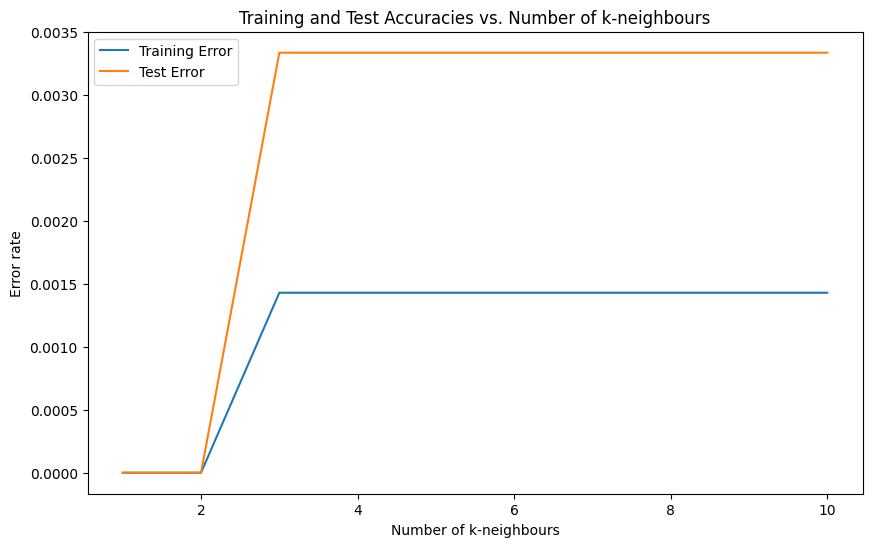

In [28]:
# Define the range of neighbors
k_neighbours_lst = range(1, 11)

def explore_kNN(X_train, X_test, y_train, y_test, k_neighbours_lst):
    train_lst=[]
    test_lst=[]
    for neighbour in k_neighbours_lst:
        knn = KNeighborsClassifier(n_neighbors=neighbour)
        knn.fit(X_train, y_train)
        training_accuracy=knn.score(X_train, y_train)
        training_error=1-training_accuracy
        test_accuracy=knn.score(X_test, y_test)
        test_error=1-test_accuracy
        train_lst.append(training_error)
        test_lst.append(test_error)
    print(k_neighbours_lst, train_lst)
    print(k_neighbours_lst, test_lst)
    plt.figure(figsize=(10, 6))
    plt.plot(k_neighbours_lst, train_lst, label="Training Error")
    plt.plot(k_neighbours_lst, test_lst, label="Test Error")
    plt.ylabel("Error rate")
    plt.xlabel("Number of k-neighbours")
    plt.title("Training and Test Accuracies vs. Number of k-neighbours")
    plt.legend()
    plt.show()
explore_kNN(X_train, X_test, y_train, y_test, k_neighbours_lst)

Based on the provided output, both the training and test accuracies are extremely high (close to 1.0) across different values of k, indicating near-perfect performance of your kNN model. 

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
# display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)


range(1, 11) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005714285714285672, 0.005714285714285672]
range(1, 11) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020000000000000018, 0.020000000000000018]


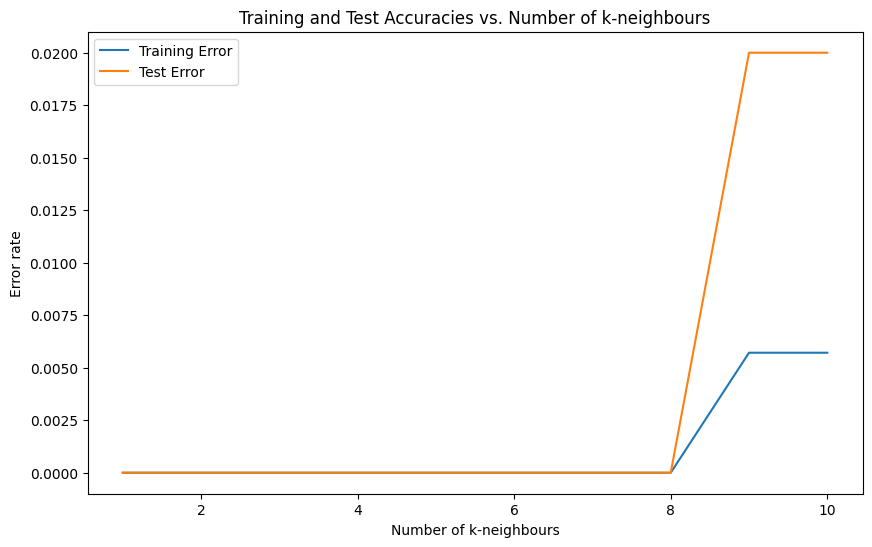

In [30]:
#Manual exploration for hyperparameters in KNN to understand the trade-off between bias and variance

train_lst= []
test_lst = []

# Define the range of neighbors
k_neighbours_lst = range(1, 11)

explore_kNN(X_train, X_test, y_train, y_test, k_neighbours_lst)

range(1, 20) [0.0, 0.0028571428571428914, 0.0028571428571428914, 0.0028571428571428914, 0.0028571428571428914, 0.0028571428571428914, 0.0028571428571428914, 0.0028571428571428914, 0.008571428571428563, 0.008571428571428563, 0.008571428571428563, 0.017142857142857126, 0.042857142857142816, 0.06999999999999995, 0.06999999999999995, 0.0842857142857143, 0.0942857142857143, 0.1071428571428571, 0.11857142857142855]
range(1, 20) [0.0, 0.0, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.0033333333333332993, 0.023333333333333317, 0.023333333333333317, 0.023333333333333317, 0.033333333333333326, 0.07333333333333336, 0.07333333333333336, 0.07333333333333336, 0.07999999999999996, 0.08666666666666667, 0.08999999999999997, 0.09999999999999998]


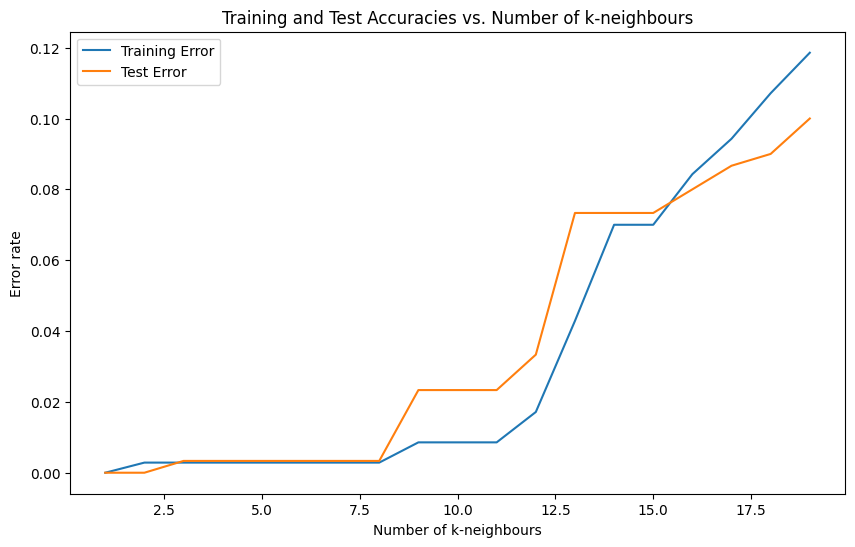

In [31]:
X_fs1= df[f_pca]
# display(X)

# scaler = StandardScaler()
# X_fs1= scaler.fit_transform(X_fs1)
k_neighbours_lst = range(1, 20)

X_train, X_test, y_train, y_test = train_test_split(X_fs1, y, test_size=0.3, shuffle=True, random_state=42)

explore_kNN(X_train, X_test, y_train, y_test, k_neighbours_lst)


range(1, 20) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017142857142857126, 0.027142857142857135, 0.027142857142857135, 0.03857142857142859, 0.050000000000000044, 0.06285714285714283, 0.06285714285714283]
range(1, 20) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026666666666666616, 0.036666666666666625, 0.036666666666666625, 0.043333333333333335, 0.050000000000000044, 0.053333333333333344, 0.053333333333333344]


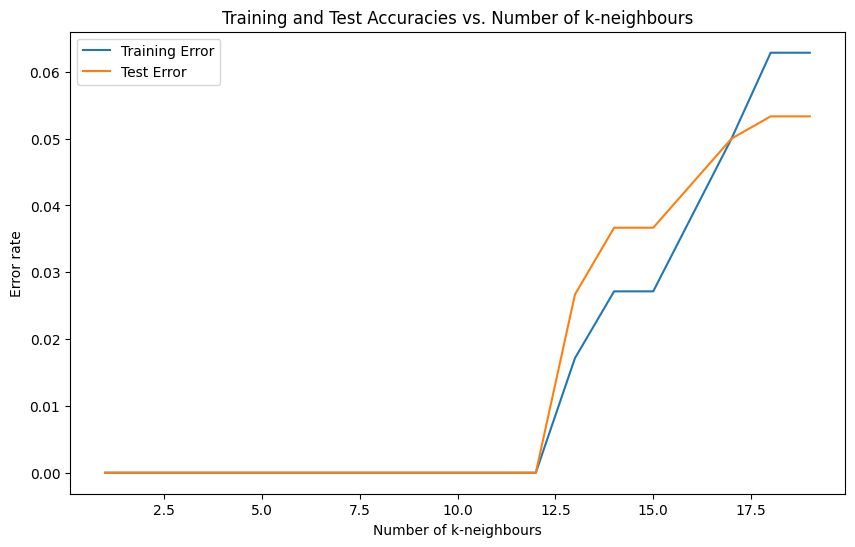

In [32]:
X_fs1= df[feature_set_dt]
# display(X)
X_train, X_test, y_train, y_test = train_test_split(X_fs1, y, test_size=0.3, shuffle=True, random_state=42)
k_neighbours_lst = range(1, 20)
explore_kNN(X_train, X_test, y_train, y_test, k_neighbours_lst)

In [33]:
svm_grid.fit(X_train, y_train)
print("Best SVM hyperparameters:", svm_grid.best_params_)
print("Best SVM score:", svm_grid.best_score_)
y_pred=svm_grid.predict(X_test)
accuracy_score(y_test, y_pred)

Best SVM hyperparameters: {'C': 0.1, 'decision_function_shape': 'ovr', 'kernel': 'poly'}
Best SVM score: 1.0


1.0

Training Accuracy:

The training accuracy remains consistently high (1.0) across different numbers of selected features. This indicates that the model achieves perfect accuracy on the training data when using these selected features.
Test Accuracy:

The test accuracy also remains high (close to 1.0) across different numbers of selected features. This suggests that the model's performance on unseen data (test set) is generally excellent, even when using a subset of features selected based on information gain.

These results are quite promising and suggest that the selected features, derived from decision tree information gain, are highly informative for predicting the target variable. The fact that both training and test accuracies are consistently high indicates that the model is likely not overfitting and is generalizing well to unseen data.


This further validifies that the model is inherently seperable

In [34]:

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def create_conclusion_matrix(y_true, y_pred, model_name, average_type=None): #choices for average_type: {‘binary’, ‘micro’, ‘macro’}
    scores=precision_recall_fscore_support(y_true, y_pred, average=average_type)
    print(f" Precision: {scores[0]:.2f}, Recall: {scores[1]:.2f}, F1-score: {scores[2]:.2f}")
    confusion_scores_matrix = confusion_matrix(y_true, y_pred)
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    
    ax = plt.subplot() 
    sns.heatmap(confusion_scores_matrix, annot=True, fmt='g', ax=ax, cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for {model_name}')


    ax.xaxis.set_ticklabels(unique_labels)
    ax.yaxis.set_ticklabels(unique_labels)
    plt.show()

Best kNN hyperparameters: {'n_neighbors': 3}
Best kNN grid-score: 1.0
 Precision: 1.00, Recall: 1.00, F1-score: 1.00


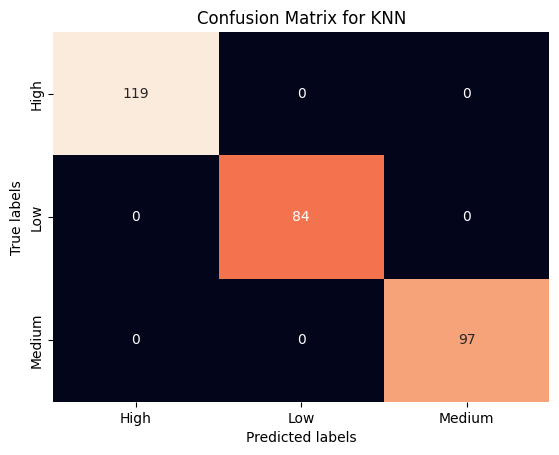

KNN prediction Accuracy:  1.0


In [35]:
knn_grid.fit(X_train, y_train)
print("Best kNN hyperparameters:", knn_grid.best_params_)
print("Best kNN grid-score:", knn_grid.best_score_)

y_pred = knn_grid.predict(X_test)
create_conclusion_matrix(y_test, y_pred, 'KNN', average_type='macro')

accuracy = accuracy_score(y_test, y_pred)
print("KNN prediction Accuracy: ", accuracy)



In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
probs = knn_grid.predict_proba(X_test)
preds = probs[:, 1]  # Keep probabilities of the positive class only


roc_auc_score(y_test, probs, multi_class='ovo')

1.0

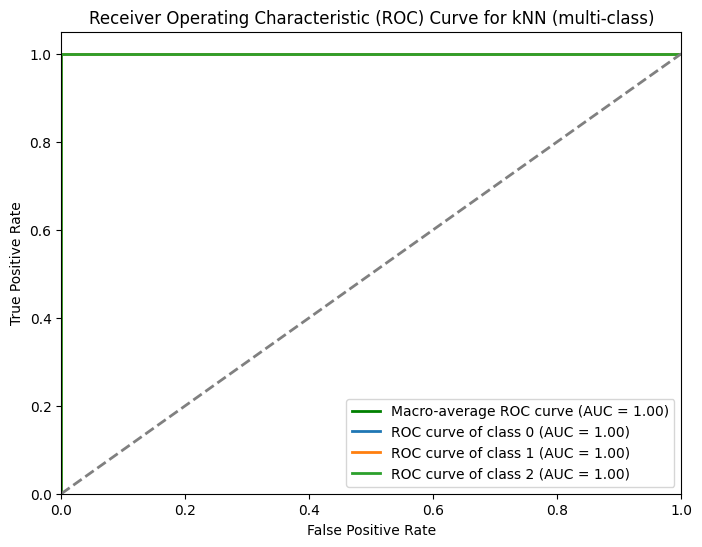

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_binary = label_binarize(y_test, classes=np.unique(y_test))
probs = knn_grid.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(np.unique(y_test)))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(np.unique(y_test))):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(np.unique(y_test))
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class and macro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["macro"], tpr["macro"], color='green', lw=2, label='Macro-average ROC curve (AUC = %0.2f)' % roc_auc["macro"])
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class %d (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for kNN (multi-class)')
plt.legend(loc='lower right')
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_fs1, y, test_size=0.3, shuffle=True, random_state=42)

create_conclusion_matrix

<function __main__.create_conclusion_matrix(y_true, y_pred, model_name, average_type=None)>

In [39]:
# logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'max_iter': [1000], 'solver': ['liblinear', 'saga']}
logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'max_iter': [500]}


logreg_grid = GridSearchCV(LogisticRegression(), param_grid=logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)
print("Best Logistic Regression hyperparameters:", logreg_grid.best_estimator_)
print("Best Logistic Regression score:", logreg_grid.best_score_)


Best Logistic Regression hyperparameters: LogisticRegression(C=1, max_iter=500)
Best Logistic Regression score: 1.0


C values: [0.001, 0.01, 0.1, 1, 10, 100]
Training errors: [0.08714285714285719, 0.050000000000000044, 0.06571428571428573, 0.0, 0.0, 0.0]
Test errors: [0.09666666666666668, 0.050000000000000044, 0.046666666666666634, 0.0, 0.0, 0.0]


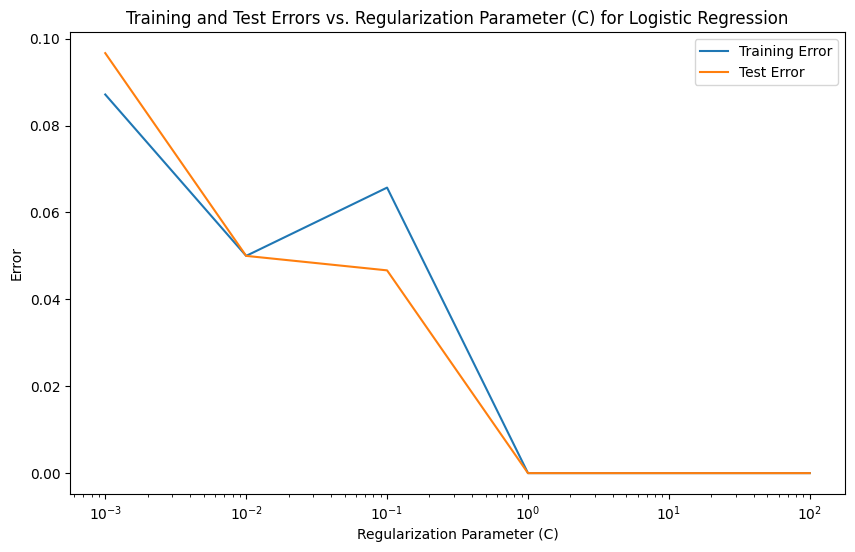

In [40]:

def explore_logistic_regression(X_train, X_test, y_train, y_test, C_values):
    train_errors = []
    test_errors = []
    
    for C_value in C_values:
        # Create and fit the logistic regression model
        logreg = LogisticRegression(C=C_value, max_iter=1000)
        logreg.fit(X_train, y_train)
        
        # Compute training error
        train_preds = logreg.predict(X_train)
        train_error = 1.0 - logreg.score(X_train, y_train)
        train_errors.append(train_error)
        
        # Compute test error
        test_preds = logreg.predict(X_test)
        test_error = 1.0 - logreg.score(X_test, y_test)
        test_errors.append(test_error)
        
    # Print errors
    print("C values:", C_values)
    print("Training errors:", train_errors)
    print("Test errors:", test_errors)
    
    # Plot errors
    plt.figure(figsize=(10, 6))
    plt.plot(C_values, train_errors, label="Training Error")
    plt.plot(C_values, test_errors, label="Test Error")
    plt.xscale('log')  # Use log scale for C values
    plt.ylabel("Error")
    plt.xlabel("Regularization Parameter (C)")
    plt.title("Training and Test Errors vs. Regularization Parameter (C) for Logistic Regression")
    plt.legend()
    plt.show()

# Example usage:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
explore_logistic_regression(X_train, X_test, y_train, y_test, C_values)

 

We can see that if c is too small, it leads to more aggresive regularisation and pushed models with coef towards 0. Hence, the model may be too constrained and unable to capture some of the complexity of the data, leading to slightly poorer performance on botht the training and test dataset

Overall, both models (KNN and logistic regression) exhibit excellent performance on the given dataset, achieving almost perfect accuracy on both training and test datasets for certain hyperparameters. These results suggest that the models are able to effectively capture the underlying patterns in the data and generalise well to unseen data.








In [41]:
knn_grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [42]:
#Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linear_clf, X, y, cv=5)
print("Mean CV accuracy:", cv_scores.mean())

Mean CV accuracy: 1.0
